# In this notebook I will make a Hovmoller Diagram of EC-Earth3 Data

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import numpy as np
import xesmf as xe
from   scipy.interpolate import griddata
import dask as dsk

import hvplot.xarray
import hvplot.pandas

from   cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec

import iris
from eofs.standard import Eof

proj = ccrs.PlateCarree()

In [2]:
# Upload all the runs:
run_12= xr.open_dataset("/nobackup/users/ommeren/ECEarth/1-2_EC-Earth_full_pacific_ocean_temperature_yearly_anomalies.nc")
run_34= xr.open_dataset("/nobackup/users/ommeren/ECEarth/3-4_EC-Earth_full_pacific_ocean_temperature_yearly_anomalies.nc")
run_56= xr.open_dataset("/nobackup/users/ommeren/ECEarth/5-6_EC-Earth_full_pacific_ocean_temperature_yearly_anomalies.nc")
run_78= xr.open_dataset("/nobackup/users/ommeren/ECEarth/7-8_EC-Earth_full_pacific_ocean_temperature_yearly_anomalies.nc")
run_910= xr.open_dataset("/nobackup/users/ommeren/ECEarth/9-10_EC-Earth_full_pacific_ocean_temperature_yearly_anomalies.nc")
run_1112= xr.open_dataset("/nobackup/users/ommeren/ECEarth/11-12_EC-Earth_full_pacific_ocean_temperature_yearly_anomalies.nc")
run_1314= xr.open_dataset("/nobackup/users/ommeren/ECEarth/corr_13-14_EC-Earth_full_pacific_ocean_temperature_yearly_anomalies.nc")
run_1516= xr.open_dataset("/nobackup/users/ommeren/ECEarth/15-16_EC-Earth_full_pacific_ocean_temperature_yearly_anomalies.nc")

In [3]:
run_1 = run_12.sel(run="r1i1p5f1")
run_1

<xarray.Dataset>
Dimensions:             (lev: 38, lat: 180, lon: 170, time: 165, vertices: 4)
Coordinates:
  * lev                 (lev) float64 1.556 2.668 3.856 ... 370.7 411.8 457.6
    run                 <U8 'r1i1p5f1'
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float64 120.5 121.5 122.5 ... 287.5 288.5 289.5
  * time                (time) datetime64[ns] 1850-12-31 ... 2014-12-31
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, vertices, lat, lon, lev) float64 ...
    vertices_longitude  (time, vertices, lat, lon, lev) float64 ...
    thetao              (time, lev, lat, lon) float32 ...

In [4]:
run_2 = run_12.sel(run="r2i1p5f1")
run_2

<xarray.Dataset>
Dimensions:             (lev: 38, lat: 180, lon: 170, time: 165, vertices: 4)
Coordinates:
  * lev                 (lev) float64 1.556 2.668 3.856 ... 370.7 411.8 457.6
    run                 <U8 'r2i1p5f1'
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float64 120.5 121.5 122.5 ... 287.5 288.5 289.5
  * time                (time) datetime64[ns] 1850-12-31 ... 2014-12-31
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, vertices, lat, lon, lev) float64 ...
    vertices_longitude  (time, vertices, lat, lon, lev) float64 ...
    thetao              (time, lev, lat, lon) float32 ...

In [5]:
run_3 = run_34.sel(run="r3i1p5f1")
run_3

<xarray.Dataset>
Dimensions:             (lev: 38, lat: 180, lon: 170, time: 165, vertices: 4)
Coordinates:
  * lev                 (lev) float64 1.556 2.668 3.856 ... 370.7 411.8 457.6
    run                 <U8 'r3i1p5f1'
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float64 120.5 121.5 122.5 ... 287.5 288.5 289.5
  * time                (time) datetime64[ns] 1850-12-31 ... 2014-12-31
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, vertices, lat, lon, lev) float64 ...
    vertices_longitude  (time, vertices, lat, lon, lev) float64 ...
    thetao              (time, lev, lat, lon) float32 ...

In [6]:
run_4 = run_34.sel(run="r4i1p5f1")
run_4

<xarray.Dataset>
Dimensions:             (lev: 38, lat: 180, lon: 170, time: 165, vertices: 4)
Coordinates:
  * lev                 (lev) float64 1.556 2.668 3.856 ... 370.7 411.8 457.6
    run                 <U8 'r4i1p5f1'
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float64 120.5 121.5 122.5 ... 287.5 288.5 289.5
  * time                (time) datetime64[ns] 1850-12-31 ... 2014-12-31
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, vertices, lat, lon, lev) float64 ...
    vertices_longitude  (time, vertices, lat, lon, lev) float64 ...
    thetao              (time, lev, lat, lon) float32 ...

In [7]:
run_7 = run_78.sel(run="r7i1p5f1")
run_7

<xarray.Dataset>
Dimensions:             (lev: 38, lat: 180, lon: 170, time: 165, vertices: 4)
Coordinates:
  * lev                 (lev) float64 1.556 2.668 3.856 ... 370.7 411.8 457.6
    run                 <U8 'r7i1p5f1'
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float64 120.5 121.5 122.5 ... 287.5 288.5 289.5
  * time                (time) datetime64[ns] 1850-12-31 ... 2014-12-31
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, vertices, lat, lon, lev) float64 ...
    vertices_longitude  (time, vertices, lat, lon, lev) float64 ...
    thetao              (time, lev, lat, lon) float32 ...

In [8]:
run_8 = run_78.sel(run="r8i1p5f1")
run_8

<xarray.Dataset>
Dimensions:             (lev: 38, lat: 180, lon: 170, time: 165, vertices: 4)
Coordinates:
  * lev                 (lev) float64 1.556 2.668 3.856 ... 370.7 411.8 457.6
    run                 <U8 'r8i1p5f1'
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float64 120.5 121.5 122.5 ... 287.5 288.5 289.5
  * time                (time) datetime64[ns] 1850-12-31 ... 2014-12-31
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, vertices, lat, lon, lev) float64 ...
    vertices_longitude  (time, vertices, lat, lon, lev) float64 ...
    thetao              (time, lev, lat, lon) float32 ...

In [9]:
run_12 = run_1112.sel(run="r12i1p5f1")
run_12

<xarray.Dataset>
Dimensions:             (lev: 38, lat: 180, lon: 170, time: 165, vertices: 4)
Coordinates:
  * lev                 (lev) float64 1.556 2.668 3.856 ... 370.7 411.8 457.6
    run                 <U9 'r12i1p5f1'
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float64 120.5 121.5 122.5 ... 287.5 288.5 289.5
  * time                (time) datetime64[ns] 1850-12-31 ... 2014-12-31
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, vertices, lat, lon, lev) float64 ...
    vertices_longitude  (time, vertices, lat, lon, lev) float64 ...
    thetao              (time, lev, lat, lon) float32 ...

In [10]:
run_14 = run_1314.sel(run="r14i1p5f1")
run_14

<xarray.Dataset>
Dimensions:             (lev: 38, lat: 180, lon: 170, time: 165, vertices: 4)
Coordinates:
  * lev                 (lev) float64 1.556 2.668 3.856 ... 370.7 411.8 457.6
    run                 <U9 'r14i1p5f1'
  * lat                 (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float64 120.5 121.5 122.5 ... 287.5 288.5 289.5
  * time                (time) datetime64[ns] 1850-12-31 ... 2014-12-31
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, vertices, lat, lon, lev) float64 ...
    vertices_longitude  (time, vertices, lat, lon, lev) float64 ...
    thetao              (time, lev, lat, lon) float32 ...

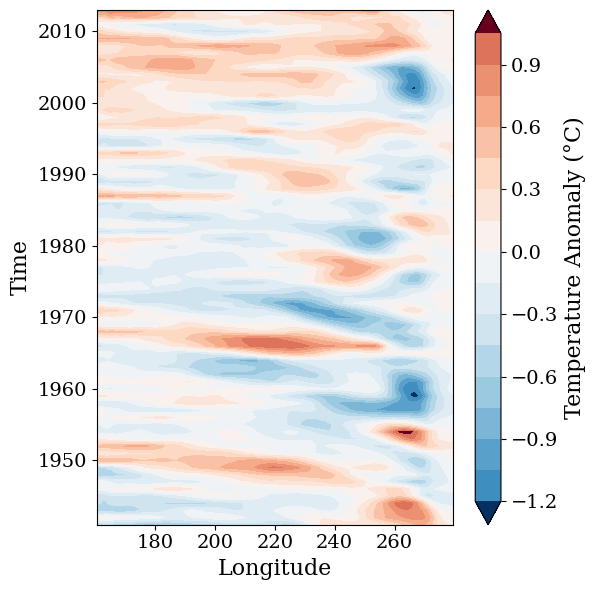

In [12]:
# Select data for EC-Earth
equator_data = run_4.sel(lat=-20, method="nearest") \
                     .sel(lev=200, method="nearest") \
                     .sel(lon=slice(160, 280)) \
                     .sel(time=slice('1940-12-31', '2012-12-31'))

# Extract values
lons = equator_data.lon.values
times = equator_data.time.values
temp_values = equator_data.thetao.values 

# Define colorbar limits
vmin, vmax = -1.8, 1.8  # Matching ORAS range

# Set Times-like font globally
plt.rcParams['font.family'] = 'serif'

# Create figure
plt.figure(figsize=(6, 6))

# Hovmöller plot
contour = plt.contourf(
    lons, times, temp_values,
    levels=20, cmap="RdBu_r", extend="both",
    vmin=vmin, vmax=vmax
)

# Colorbar
cbar = plt.colorbar(contour)
cbar.set_label("Temperature Anomaly (°C)", fontsize=16)
cbar.ax.tick_params(labelsize=14)

# Axis labels
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Time", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save high-res figure
plt.tight_layout()
plt.savefig("EC_Earth_Hovmoller.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()


In [13]:
# Find the highest and lowest anomaly values
max_anomaly = np.nanmax(temp_values)
min_anomaly = np.nanmin(temp_values)

print(f"Maximum Temperature Anomaly: {max_anomaly:.2f} °C")
print(f"Minimum Temperature Anomaly: {min_anomaly:.2f} °C")


Maximum Temperature Anomaly: 1.13 °C
Minimum Temperature Anomaly: -1.25 °C


In [14]:
# Flatten the data and ignore NaNs
flattened = temp_values.flatten()
valid_data = flattened[~np.isnan(flattened)]

# Separate positive and negative anomalies
positive_anomalies = valid_data[valid_data > 0]
negative_anomalies = valid_data[valid_data < 0]

# Compute averages
avg_positive = np.mean(positive_anomalies) if positive_anomalies.size > 0 else np.nan
avg_negative = np.mean(negative_anomalies) if negative_anomalies.size > 0 else np.nan

print(f"Average Positive Anomaly: {avg_positive:.2f} °C")
print(f"Average Negative Anomaly: {avg_negative:.2f} °C")


Average Positive Anomaly: 0.28 °C
Average Negative Anomaly: -0.27 °C


## ORAs data

In [15]:
temp_5814= xr.open_dataset("/nobackup/users/ommeren/full_pacific_ocean_temperature_yearly_anomalies_58-14.nc")
temp_1518= xr.open_dataset("/nobackup/users/ommeren/full_pacific_ocean_temperature_yearly_anomalies_15-18_correct.nc")
temp_1923= xr.open_dataset("/nobackup/users/ommeren/full_pacific_ocean_temperature_yearly_anomalies_19-23_correct.nc")

In [16]:
temp_ya = xr.concat([temp_5814, temp_1518, temp_1923], dim="time")
temp_ya 

<xarray.Dataset>
Dimensions:   (deptht: 38, lat: 180, lon: 170, time: 66)
Coordinates:
  * deptht    (deptht) float32 1.556 2.668 3.856 5.14 ... 370.7 411.8 457.6
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * time      (time) datetime64[ns] 1958-12-31 1959-12-31 ... 2023-12-31
Data variables:
    votemper  (time, deptht, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

## ORAs5 Hovmoller:

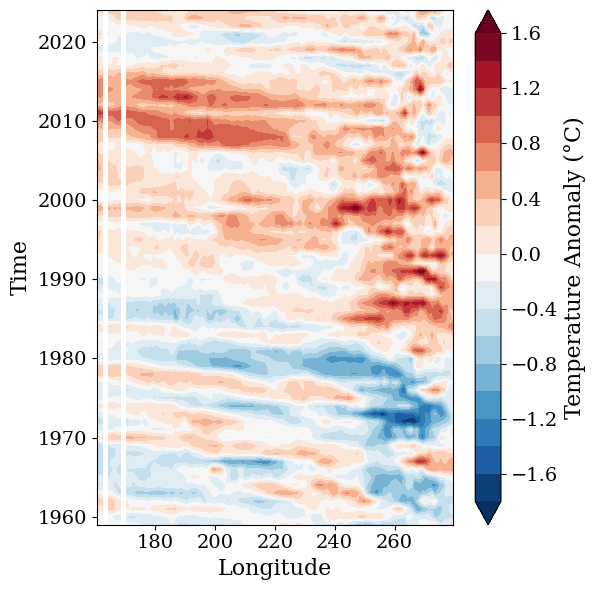

In [18]:
# Select equatorial data
equator_data = temp_ya.sel(lat=-20, method="nearest") \
                      .sel(deptht=200, method="nearest") \
                      .sel(lon=slice('160', '280'))

# Extract values
lons = equator_data.lon.values
times = equator_data.time.values
temp_values = equator_data.votemper.values  

# Font
plt.rcParams['font.family'] = 'serif'

# Create figure
plt.figure(figsize=(6, 6))

# Hovmöller plot
contour = plt.contourf(
    lons, times, temp_values,
    levels=20, cmap="RdBu_r", extend="both"
)

# Colorbar
cbar = plt.colorbar(contour)
cbar.set_label("Temperature Anomaly (°C)", fontsize=16)
cbar.ax.tick_params(labelsize=14)

# Axis labels and title
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Time", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Save and show
plt.tight_layout()
plt.savefig("ORAS5_Hovmoller_200m.png", dpi=300, bbox_inches="tight")
plt.show()


## I am going to try and make EOF's

In [36]:
#Load data and select SST's 
ds = temp_ya.sel(lat=slice(-70, 70))
sst_anom = ds["votemper"].sel(deptht=0, method = "nearest")

#Change from xarray to numpy, since EOF wants NumPy:
sst_data = sst_anom.values

# Extract lat/lon
lats = ds["lat"].values
lons = ds["lon"].values

#This converts the lat to rad and takes the cosine of the rad:
coslat = np.cos(np.deg2rad(lats))
#This takes the root and expands the dimensions for weighting
wgts = np.sqrt(coslat)[..., np.newaxis]


In [37]:
# Create EOF solver (Find the dominant pattern) using correct weights: 
solver = Eof(sst_data, weights=wgts)

# Retrieve the leading EOF (EOF1) as a correlation pattern
eof1 = -solver.eofsAsCorrelation(neofs=1)
pc1 = -solver.pcs(npcs=1, pcscaling=1)

# Print variance explained by EOF1
variance_fraction = solver.varianceFraction(neigs=1) * 100
print(f"EOF1 explains {variance_fraction[0]:.2f}% of the variance")

EOF1 explains 32.62% of the variance


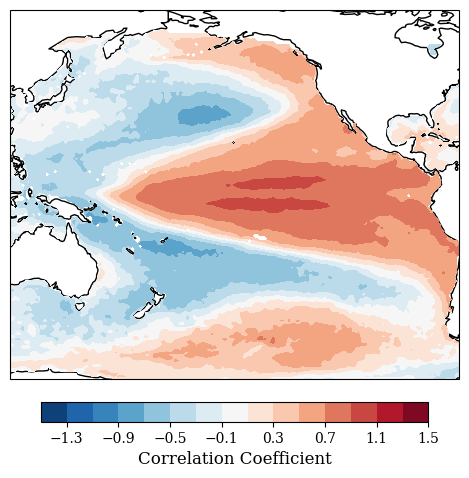

In [38]:
# Set contour levels
clevs = np.linspace(-1.5, 1.5, 16)

# Create map projection
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=190)})

# Plot EOF1 as correlation
fill = ax.contourf(lons, lats, eof1.squeeze(), clevs, transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)

# Add coastlines and land features
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')

# Add colorbar
cb = plt.colorbar(fill, orientation='horizontal', shrink=0.5, pad=0.05)
cb.set_label("Correlation Coefficient", fontsize=12)

# Add title
#plt.title("EOF1 (SST's in ORAs)", fontsize=16)
plt.show()

fig.savefig('EOF1_ORAs.png', dpi=300, bbox_inches='tight')  # Save with 300 dpi for quality

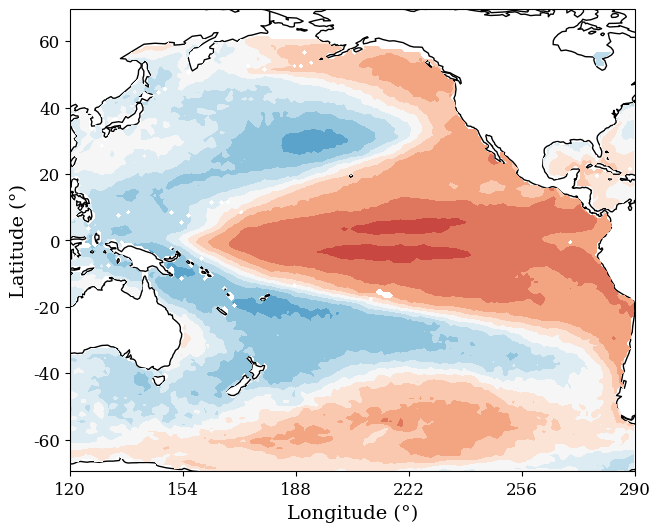

In [54]:
# Set contour levels
clevs = np.linspace(-1.5, 1.5, 16)

# Create map projection
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=190)})

# Plot EOF1 as correlation
fill = ax.contourf(lons, lats, eof1.squeeze(), clevs, transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)

# Add coastlines and land features
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')

# Add colorbar
#cb = plt.colorbar(fill, orientation='horizontal', shrink=0.5, pad=0.05)
#cb.set_label("Correlation Coefficient", fontsize=14)

yticks = [-60, -40, -20, 0, 20, 40, 60]
xticks = [120, 154, 188, 222, 256, 290]
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.set_yticklabels([str(y) for y in yticks], fontsize=12)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_xticklabels([str(x) for x in xticks], fontsize=12)


# Set axis labels
ax.set_xlabel("Longitude (°)", fontsize=14)
ax.set_ylabel("Latitude (°)" , fontsize=14)

# Show and save
plt.show()
fig.savefig('EOF1_ORAs_labeled.png', dpi=300, bbox_inches='tight')



# PC

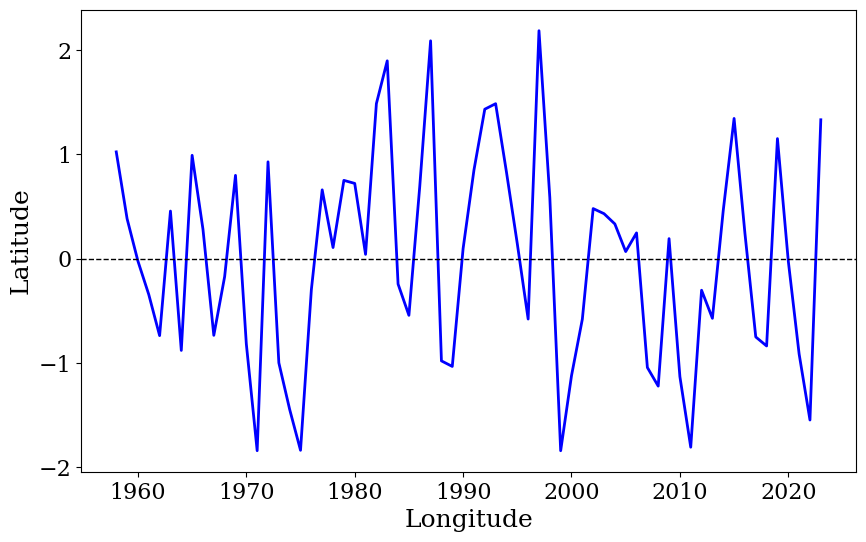

In [24]:
# Definieer de tijdsvariabele (jaren)
years = ds["time.year"].values  # Haal de jaren uit je dataset

# Plot de PC1 tijdreeks
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(years, pc1.squeeze(), color='b', linewidth=2)  # Zorg dat PC1 een 1D-array is
plt.axhline(0, color='k', linestyle="--", linewidth=1)

# Labels en titel
plt.xlabel("Year")
plt.ylabel("Standardized PC1")
# Set X and Y axis labels bigger
ax.set_xlabel('Longitude', fontsize=18)
ax.set_ylabel('Latitude', fontsize=18)

# Make tick labels bigger
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_yticks([-2,-1,0, 1, 2])

# Toon de plot
plt.show()


fig.savefig('PC1_ORAs.png', dpi=300, bbox_inches='tight')  # Save with 300 dpi for quality

In [25]:
spcs_values = pc1.squeeze()

# Create a list of (year, SPCS) pairs
spcs_list = list(zip(years, spcs_values))

# Print the list
for year, spcs in spcs_list:
    print(f"Year: {year}, SPCS: {spcs:.2f}")


Year: 1958, SPCS: 1.02
Year: 1959, SPCS: 0.38
Year: 1960, SPCS: -0.02
Year: 1961, SPCS: -0.34
Year: 1962, SPCS: -0.74
Year: 1963, SPCS: 0.46
Year: 1964, SPCS: -0.88
Year: 1965, SPCS: 0.99
Year: 1966, SPCS: 0.28
Year: 1967, SPCS: -0.73
Year: 1968, SPCS: -0.17
Year: 1969, SPCS: 0.80
Year: 1970, SPCS: -0.82
Year: 1971, SPCS: -1.84
Year: 1972, SPCS: 0.93
Year: 1973, SPCS: -1.00
Year: 1974, SPCS: -1.44
Year: 1975, SPCS: -1.84
Year: 1976, SPCS: -0.30
Year: 1977, SPCS: 0.66
Year: 1978, SPCS: 0.11
Year: 1979, SPCS: 0.75
Year: 1980, SPCS: 0.72
Year: 1981, SPCS: 0.04
Year: 1982, SPCS: 1.49
Year: 1983, SPCS: 1.89
Year: 1984, SPCS: -0.24
Year: 1985, SPCS: -0.54
Year: 1986, SPCS: 0.69
Year: 1987, SPCS: 2.09
Year: 1988, SPCS: -0.98
Year: 1989, SPCS: -1.03
Year: 1990, SPCS: 0.10
Year: 1991, SPCS: 0.85
Year: 1992, SPCS: 1.43
Year: 1993, SPCS: 1.48
Year: 1994, SPCS: 0.83
Year: 1995, SPCS: 0.14
Year: 1996, SPCS: -0.58
Year: 1997, SPCS: 2.18
Year: 1998, SPCS: 0.58
Year: 1999, SPCS: -1.84
Year: 2000, SPCS

# EC-Earth3

# EOF's

In [34]:
#Load data and select SST's 
ds = run_4.sel(lat=slice(-70, 70),time=slice('1948', '2014'))
sst_anom = ds["thetao"].isel(lev=0)

#Change from xarray to numpy, since EOF wants NumPy:
sst_data = sst_anom.values

# Extract lat/lon
lats = ds["lat"].values
lons = ds["lon"].values

#This converts the lat to rad and takes the cosine of the rad:
coslat = np.cos(np.deg2rad(lats))
#This takes the root and expands the dimensions for weighting
wgts = np.sqrt(coslat)[..., np.newaxis]

In [35]:
# Create EOF solver (Find the dominant pattern) using correct weights: 
solver = Eof(sst_data, weights=wgts)

# Retrieve the leading EOF (EOF1) as a correlation pattern
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)

# Print variance explained by EOF1
variance_fraction = solver.varianceFraction(neigs=1) * 100
print(f"EOF1 explains {variance_fraction[0]:.2f}% of the variance")

EOF1 explains 31.17% of the variance


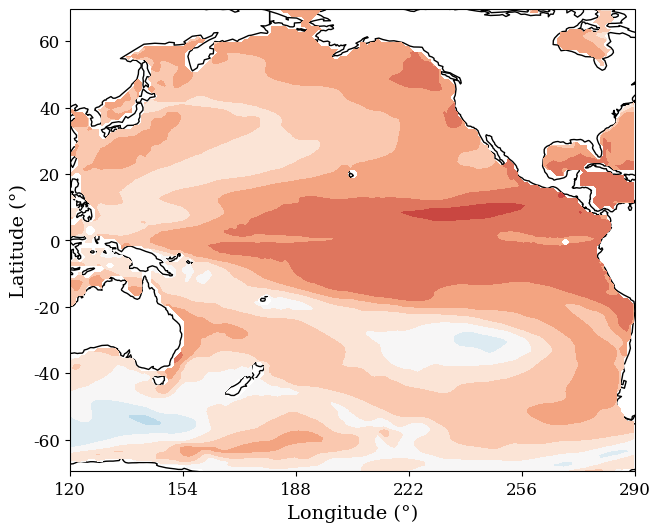

In [36]:
# Set contour levels
clevs = np.linspace(-1.5, 1.5, 16)

# Create map projection
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=190)})

# Plot EOF1 as correlation
fill = ax.contourf(lons, lats, eof1.squeeze(), clevs, transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)

# Add coastlines and land features
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')

# Add colorbar
#cb = plt.colorbar(fill, orientation='horizontal')
#cb.ax.tick_params(labelsize=14) 
#cb.set_label("Correlation Coefficient", fontsize=12)

# Customize ticks
yticks = [-60, -40, -20, 0, 20, 40, 60]
xticks = [120, 154, 188, 222, 256, 290]
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.set_yticklabels([str(y) for y in yticks], fontsize=12)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_xticklabels([str(x) for x in xticks], fontsize=12)

# Set axis labels
ax.set_xlabel("Longitude (°)", fontsize=14)
ax.set_ylabel("Latitude (°)", fontsize=14)
# Add title
#plt.title("EOF1 (SST's in EC-Earth3; run 4)", fontsize=16)
plt.show()

# Save the figure
fig.savefig('EOF1_run4.png', dpi=300, bbox_inches='tight')  # Save with 300 dpi for quality

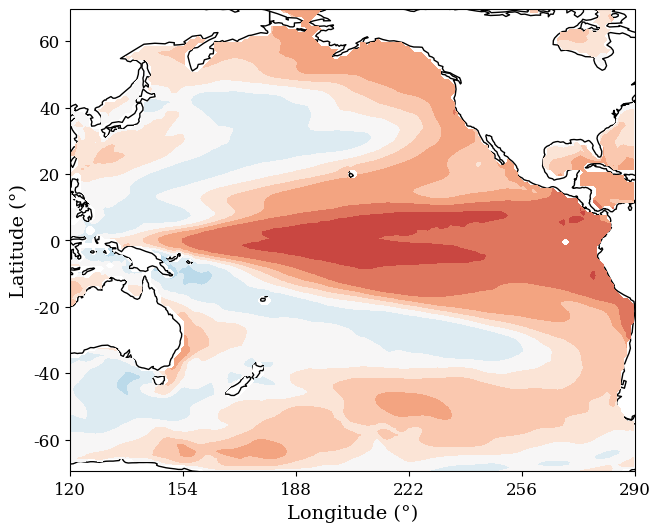

In [59]:
# Set contour levels
clevs = np.linspace(-1.5, 1.5, 16)

# Create map projection
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=190)})

# Plot EOF1 as correlation
fill = ax.contourf(lons, lats, eof1.squeeze(), clevs, transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)

# Add coastlines and land features
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')

# Customize ticks
yticks = [-60, -40, -20, 0, 20, 40, 60]
xticks = [120, 154, 188, 222, 256, 290]
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.set_yticklabels([str(y) for y in yticks], fontsize=12)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_xticklabels([str(x) for x in xticks], fontsize=12)

# Set axis labels
ax.set_xlabel("Longitude (°)", fontsize=14)
ax.set_ylabel("Latitude (°)", fontsize=14)

# Show and save
plt.show()
fig.savefig('EOF1_run4.png', dpi=300, bbox_inches='tight')


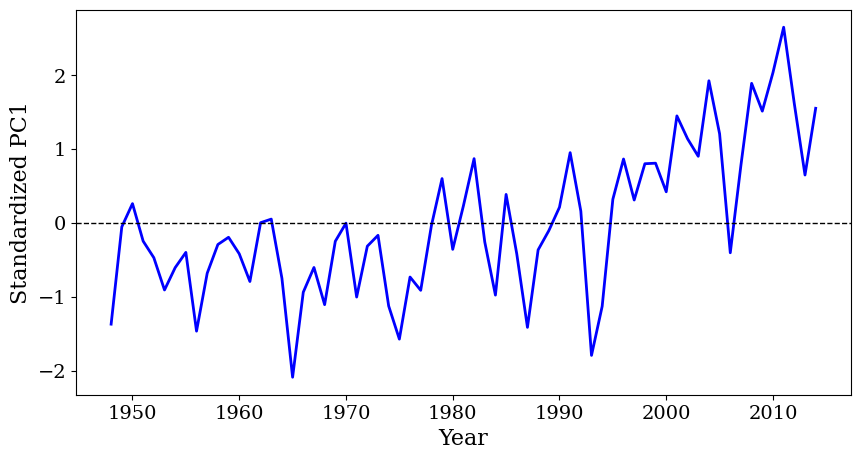

In [38]:
import matplotlib.pyplot as plt

# Definieer de tijdsvariabele (jaren)
years = ds["time.year"].values  # Haal de jaren uit je dataset

# Maak een figure en een as-object
fig, ax = plt.subplots(figsize=(10, 5))

# Plot de PC1 tijdreeks
ax.plot(years, pc1.squeeze(), color='b', linewidth=2)  # Zorg dat PC1 een 1D-array is
ax.axhline(0, color='k', linestyle="--", linewidth=1)

# Labels en titel met grotere fontgrootte
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Standardized PC1", fontsize=16)

# Grotere tick labels
ax.tick_params(axis='both', which='major', labelsize=14)

# Save the figure before showing it
fig.savefig('PC1.png', dpi=300, bbox_inches='tight')

# Toon de plot
plt.show()




In [31]:
spcs_values = pc1.squeeze()

# Create a list of (year, SPCS) pairs
spcs_list = list(zip(years, spcs_values))

# Print the list
for year, spcs in spcs_list:
    print(f"Year: {year}, SPCS: {spcs:.2f}")

Year: 1850, SPCS: 0.05
Year: 1851, SPCS: -0.24
Year: 1852, SPCS: 0.20
Year: 1853, SPCS: 0.90
Year: 1854, SPCS: -0.72
Year: 1855, SPCS: -1.99
Year: 1856, SPCS: -0.57
Year: 1857, SPCS: 0.09
Year: 1858, SPCS: 0.04
Year: 1859, SPCS: 0.41
Year: 1860, SPCS: -0.70
Year: 1861, SPCS: -1.58
Year: 1862, SPCS: -1.19
Year: 1863, SPCS: -1.18
Year: 1864, SPCS: 0.63
Year: 1865, SPCS: 1.73
Year: 1866, SPCS: -0.71
Year: 1867, SPCS: -1.77
Year: 1868, SPCS: -0.94
Year: 1869, SPCS: -0.32
Year: 1870, SPCS: 0.60
Year: 1871, SPCS: 0.57
Year: 1872, SPCS: -0.18
Year: 1873, SPCS: -0.90
Year: 1874, SPCS: -0.44
Year: 1875, SPCS: -1.06
Year: 1876, SPCS: -0.53
Year: 1877, SPCS: 0.27
Year: 1878, SPCS: 0.55
Year: 1879, SPCS: 0.24
Year: 1880, SPCS: -0.15
Year: 1881, SPCS: 0.71
Year: 1882, SPCS: -0.01
Year: 1883, SPCS: 0.24
Year: 1884, SPCS: 0.81
Year: 1885, SPCS: -0.59
Year: 1886, SPCS: -0.99
Year: 1887, SPCS: -1.27
Year: 1888, SPCS: 0.24
Year: 1889, SPCS: 1.93
Year: 1890, SPCS: -0.29
Year: 1891, SPCS: -0.78
Year: 1892

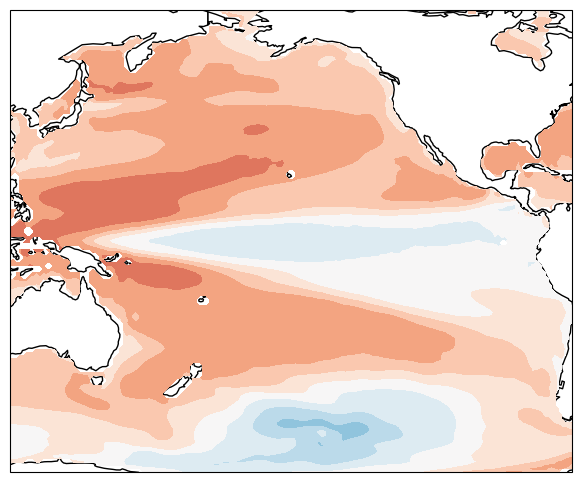

In [32]:
# Set contour levels
clevs = np.linspace(-1.5, 1.5, 16)

# Create map projection
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree(central_longitude=190)})

# Plot EOF1 as correlation
fill = ax.contourf(lons, lats, eof2.squeeze(), clevs, transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)

# Add coastlines and land features
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')

plt.show()

# Save the figure
fig.savefig('EOF2_run4.png', dpi=300, bbox_inches='tight')  # Save with 300 dpi for quality

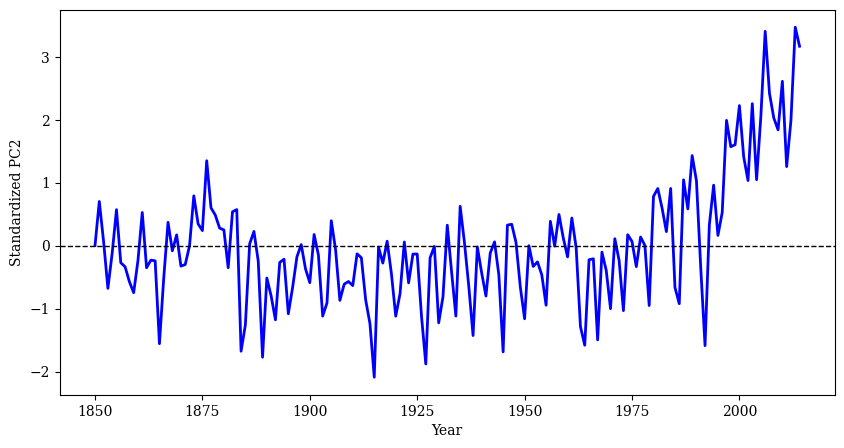

In [33]:
import matplotlib.pyplot as plt

# Definieer de tijdsvariabele (jaren)
years = ds["time.year"].values  # Haal de jaren uit je dataset

# Maak een figure en een as-object
fig, ax = plt.subplots(figsize=(10, 5))

# Plot de PC1 tijdreeks
ax.plot(years, pc2.squeeze(), color='b', linewidth=2)  # Zorg dat PC1 een 1D-array is
ax.axhline(0, color='k', linestyle="--", linewidth=1)

# Labels en titel
ax.set_xlabel("Year")
ax.set_ylabel("Standardized PC2")

# Save the figure before showing it
fig.savefig('PC2.png', dpi=300, bbox_inches='tight')

# Toon de plot
plt.show()

# Cross Sections

In [61]:
# Cross section ORAs:
ORAs_cross_section_240 = temp_ya.votemper.sel(lon=240, method = 'nearest')
ORAs_cross_section_240

#Cross section EC-Earth:
EC_cross_section_240 = run_4.thetao.sel(lon=240, method = 'nearest')
EC_cross_section_240

<xarray.DataArray 'thetao' (time: 165, lev: 38, lat: 180)>
[1128600 values with dtype=float32]
Coordinates:
  * lev      (lev) float64 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
    run      <U8 'r4i1p5f1'
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    lon      float64 240.5
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31

## ORAs

## Try to make EOF's

In [111]:
#Load data and select SST's 
ds = temp_ya
anom_240 = ds["votemper"].sel(lon=240, method = "nearest")

#Change from xarray to numpy, since EOF wants NumPy:
data_240 = anom_240.values

# Extract lat/lon
lats = ds["lat"].values

#This converts the lat to rad and takes the cosine of the rad:
coslat = np.cos(np.deg2rad(lats))
#This takes the root and expands the dimensions for weighting
wgts = np.sqrt(coslat)[np.newaxis,:]
#Extent for the depths:
wgts = np.tile(wgts, (data_240.shape[1], 1))  

In [112]:
# Create EOF solver (Find the dominant pattern) using correct weights: 
solver = Eof(data_240, weights=wgts)

# Retrieve the leading EOF (EOF1) as a correlation pattern
eof1 = -solver.eofsAsCorrelation(neofs=1)
pc1 = -solver.pcs(npcs=1, pcscaling=1)

# Print variance explained by EOF1
variance_fraction = solver.varianceFraction(neigs=1) * 100
print(f"EOF1 explains {variance_fraction[0]:.2f}% of the variance")

EOF1 explains 39.35% of the variance


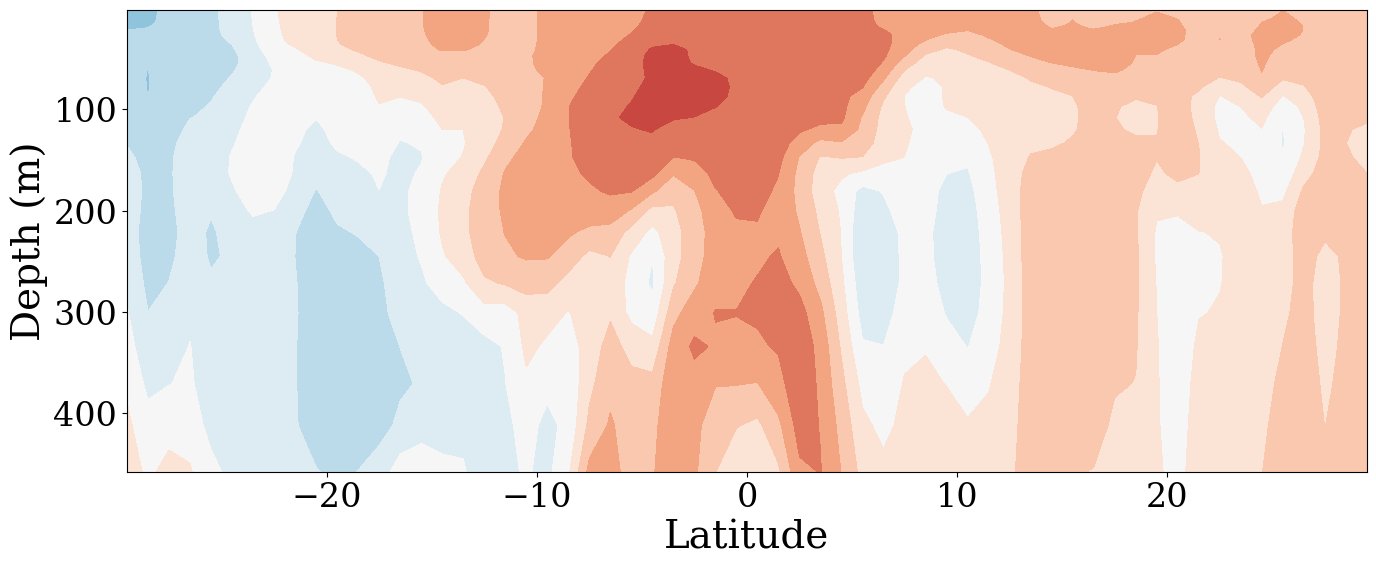

In [117]:
# Define latitude range for plotting (-30 to 30)
lat_min, lat_max = -30, 30

# Find indices where latitudes fall within this range
lat_indices = np.where((lats >= lat_min) & (lats <= lat_max))[0]

# Subset EOF1 and latitudes **only for plotting**
eof1_subset = eof1.squeeze()[:, lat_indices]  # Keep all depths, subset latitudes
lats_subset = lats[lat_indices]  # Subset latitudes

# Extract depth values
depths = ds["deptht"].values  # Get depth levels

# Set contour levels
clevs = np.linspace(-1.5, 1.5, 16)

# Create figure for depth-latitude cross-section
fig, ax = plt.subplots(figsize=(16, 6))

# Plot EOF1 as a depth-latitude cross-section
fill = ax.contourf(lats_subset, depths, eof1_subset, levels=clevs, cmap=plt.cm.RdBu_r)

# Invert y-axis so depth increases downward
ax.invert_yaxis()

# Add colorbar
#cb = plt.colorbar(fill, orientation='horizontal')
#cb.set_label("Correlation Coefficient", fontsize=18)

# Add labels and title
ax.set_xlabel("Latitude (°)")
ax.set_ylabel("Depth (m)")
# Set X and Y axis labels bigger
ax.set_xlabel('Latitude', fontsize=28)
ax.set_ylabel('Depth (m)', fontsize=28)

# Make tick labels bigger
ax.tick_params(axis='both', which='major', labelsize=24)

# Save the figure before showing it
fig.savefig('EOF1_ORAs_240.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


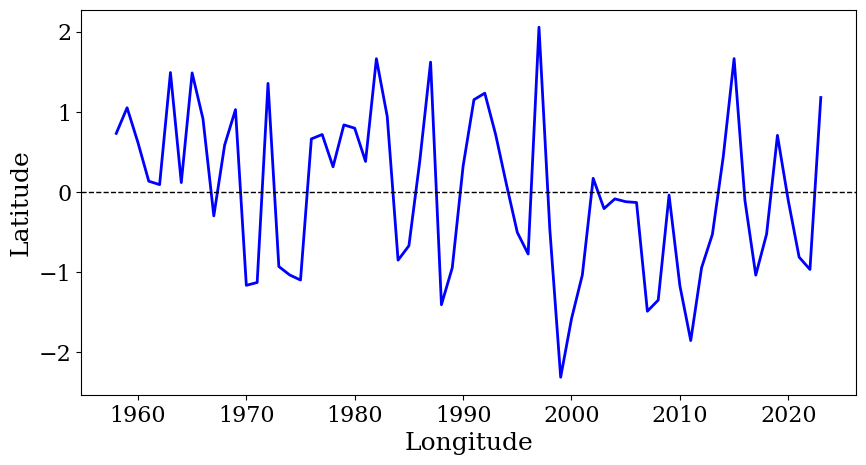

In [72]:
# Definieer de tijdsvariabele (jaren)
years = ds["time.year"].values  # Haal de jaren uit je dataset

# Plot de PC1 tijdreeks
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(years, pc1.squeeze(), color='b', linewidth=2)  # Zorg dat PC1 een 1D-array is
plt.axhline(0, color='k', linestyle="--", linewidth=1)

# Labels en titel
plt.xlabel("Year")
plt.ylabel("Standardized PC1")
# Set X and Y axis labels bigger
ax.set_xlabel('Longitude', fontsize=18)
ax.set_ylabel('Latitude', fontsize=18)

# Make tick labels bigger
ax.tick_params(axis='both', which='major', labelsize=16)

# Save the figure before showing it
fig.savefig('PC1_ORAs_240.png', dpi=300, bbox_inches='tight')

# Toon de plot
plt.show()


In [ ]:
spcs_values = pc1.squeeze()

# Create a list of (year, SPCS) pairs
spcs_list = list(zip(years, spcs_values))

# Print the list
for year, spcs in spcs_list:
    print(f"Year: {year}, SPCS: {spcs:.2f}")

## EC-Earth

## Now I try to make a EOF of EC-Earth 240*

In [104]:
#Load data and select SST's 
ds = run_4
anom_240 = ds["thetao"].sel(lon=240, method = "nearest")

#Change from xarray to numpy, since EOF wants NumPy:
data_240 = anom_240.values

# Extract lat/lon
lats = ds["lat"].values

#This converts the lat to rad and takes the cosine of the rad:
coslat = np.cos(np.deg2rad(lats))
#This takes the root and expands the dimensions for weighting
wgts = np.sqrt(coslat)[np.newaxis,:]
#Extent for the depths:
wgts = np.tile(wgts, (data_240.shape[1], 1)) 

In [105]:
# Create EOF solver (Find the dominant pattern) using correct weights: 
solver = Eof(data_240, weights=wgts)

# Retrieve the leading EOF (EOF1) as a correlation pattern
eof1 = -solver.eofsAsCorrelation(neofs=1)
pc1 = -solver.pcs(npcs=1, pcscaling=1)

# Print variance explained by EOF1
variance_fraction = solver.varianceFraction(neigs=1) * 100
print(f"EOF1 explains {variance_fraction[0]:.2f}% of the variance")

EOF1 explains 33.89% of the variance


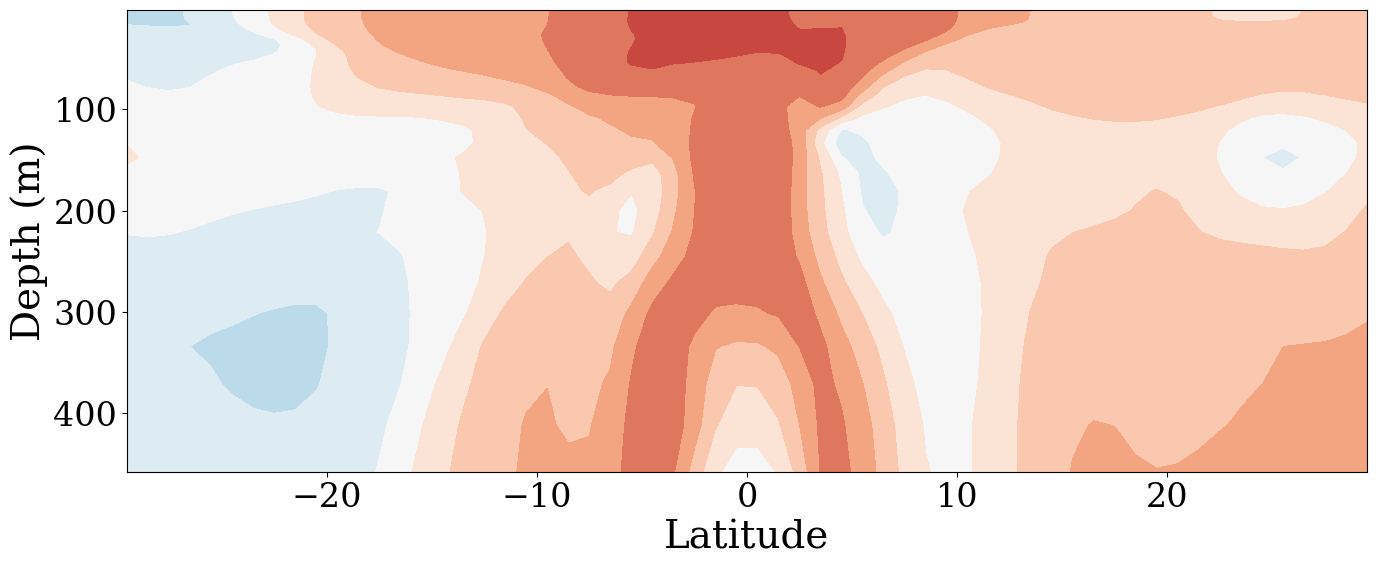

In [107]:
# Define latitude range for plotting (-30 to 30)
lat_min, lat_max = -30, 30

# Find indices where latitudes fall within this range
lat_indices = np.where((lats >= lat_min) & (lats <= lat_max))[0]

# Subset EOF1 and latitudes only for plotting
eof1_subset = eof1.squeeze()[:, lat_indices]  # All depths, subset latitudes
lats_subset = lats[lat_indices]

# Extract depth values
depths = ds["lev"].values

# Set contour levels
clevs = np.linspace(-1.5, 1.5, 16)

# Create figure
fig, ax = plt.subplots(figsize=(16, 6))

# Plot the EOF1 cross-section
fill = ax.contourf(lats_subset, depths, eof1_subset, levels=clevs, cmap=plt.cm.RdBu_r)

# Invert y-axis for ocean depth convention
ax.invert_yaxis()

# Axis labels with increased font size
ax.set_xlabel("Latitude", fontsize=28)
ax.set_ylabel("Depth (m)", fontsize=28)

# Tick label sizes
ax.tick_params(axis='both', which='major', labelsize=24)

# Optional colorbar
#cb = plt.colorbar(fill, orientation='horizontal')
#cb.set_label("Correlation Coefficient", fontsize=24)

# Show the plot
plt.show()

# Save the figure
fig.savefig('EOF1_run4_240.png', dpi=300, bbox_inches='tight')


In [ ]:
import matplotlib.pyplot as plt

# Definieer de tijdsvariabele (jaren)
years = ds["time.year"].values  # Haal de jaren uit je dataset

# Maak een figure en een as-object
fig, ax = plt.subplots(figsize=(10, 5))

# Plot de PC1 tijdreeks
ax.plot(years, pc1.squeeze(), color='b', linewidth=2)  # Zorg dat PC1 een 1D-array is
ax.axhline(0, color='k', linestyle="--", linewidth=1)

# Labels en titel met grotere fontgrootte
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Standardized PC1", fontsize=16)


# Vergroot tick label grootte
ax.tick_params(axis='both', which='major', labelsize=14)

# Save the figure
fig.savefig('PC1_TimeSeries.png', dpi=300, bbox_inches='tight')

# Toon de plot
plt.show()


In [ ]:
spcs_values = pc1.squeeze()

# Create a list of (year, SPCS) pairs
spcs_list = list(zip(years, spcs_values))

# Print the list
for year, spcs in spcs_list:
    print(f"Year: {year}, SPCS: {spcs:.2f}")

# Cross-Section along Equator

In [83]:
# ORAs
ORAs_cross_section_0 = temp_ya.votemper.sel(lat=-25, method = 'nearest')
ORAs_cross_section_0

#EC-Earth
EC_cross_section_0 = run_4.thetao.sel(lat=-25, method = 'nearest')
EC_cross_section_0


<xarray.DataArray 'thetao' (time: 165, lev: 38, lon: 170)>
[1065900 values with dtype=float32]
Coordinates:
  * lev      (lev) float64 1.556 2.668 3.856 5.14 ... 333.9 370.7 411.8 457.6
    run      <U8 'r4i1p5f1'
    lat      float64 -24.5
  * lon      (lon) float64 120.5 121.5 122.5 123.5 ... 286.5 287.5 288.5 289.5
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31

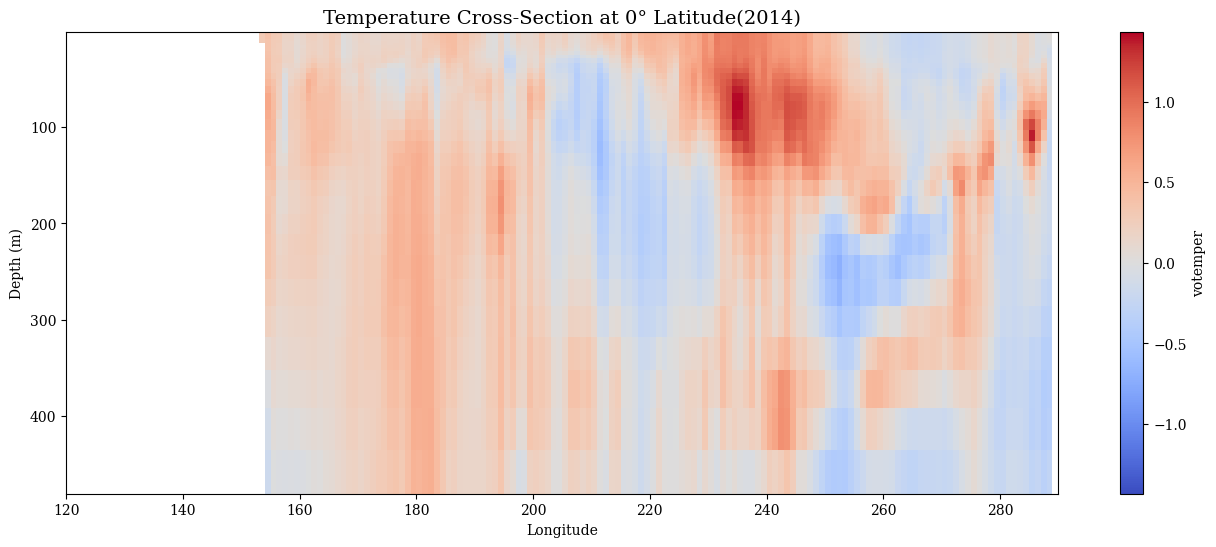

In [84]:
# Select data along 0° longitude in 2014
cross_section_0_2014 = ORAs_cross_section_0.sel(time="2002-12-31")

# Create the plot
fig, ax = plt.subplots(figsize=(16, 6))
cross_section_0_2014.plot(ax=ax, cmap="coolwarm")

# Invert Y-axis (depth increases downward)
ax.invert_yaxis()

# Add labels and title
ax.set_title("Temperature Cross-Section at 0° Latitude(2014)", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Depth (m)")

# Show plot
plt.show() 

## Now I make a EOF

In [108]:
#Load data and select SST's 
ds = temp_ya
anom_0 = ds["votemper"].sel(lat=0, method = "nearest")

#Change from xarray to numpy, since EOF wants NumPy:
data_0 = anom_0.values

# Extract lat/lon
lons = ds["lon"].values

# These 2 steps account for that the gridcells are not even throughout the earth:

#This converts the lat to rad and takes the cosine of the rad:
wgts = np.ones((data_0.shape[1], data_0.shape[2]))

In [109]:
# Create EOF solver (Find the dominant pattern) using correct weights: 
solver = Eof(data_0, weights=wgts)

# Retrieve the leading EOF (EOF1) as a correlation pattern
eof1 = -solver.eofsAsCorrelation(neofs=1)
pc1 = -solver.pcs(npcs=1, pcscaling=1)

# Print variance explained by EOF1
variance_fraction = solver.varianceFraction(neigs=1) * 100
print(f"EOF1 explains {variance_fraction[0]:.2f}% of the variance")

EOF1 explains 62.82% of the variance


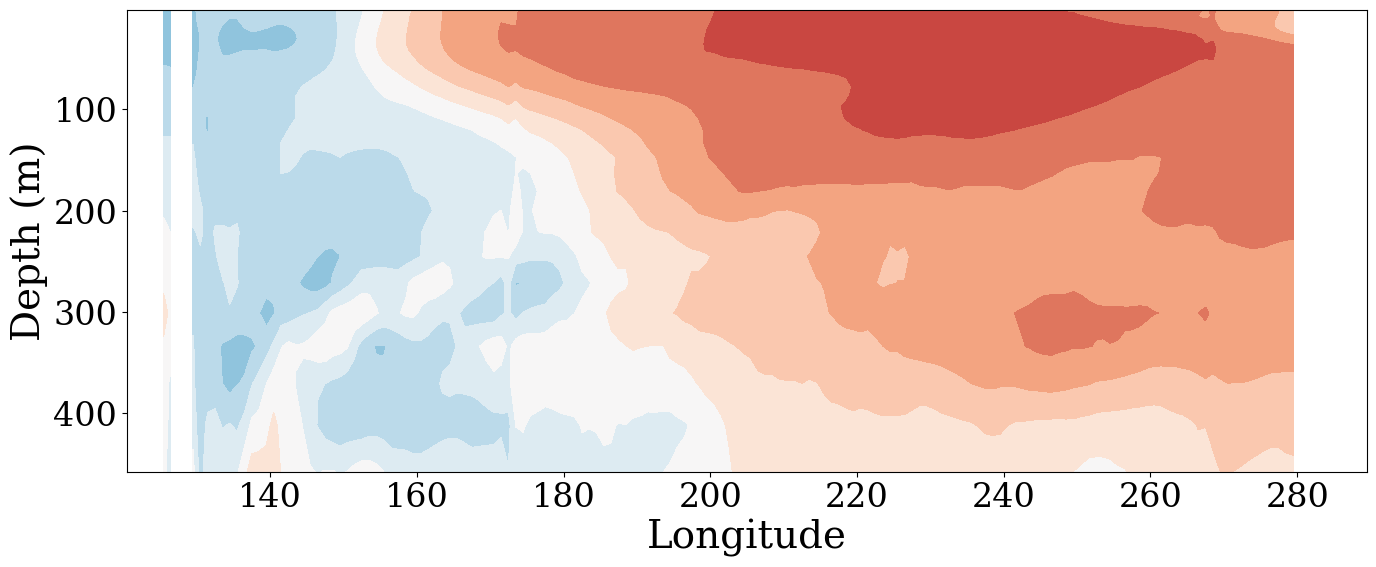

In [110]:
# Extract depth values
depths = ds["deptht"].values  # Get depth levels
lons_subset = lons  # Longitude remains the same

# Set contour levels
clevs = np.linspace(-1.5, 1.5, 16)

# Create figure for depth-longitude cross-section
fig, ax = plt.subplots(figsize=(16, 6))

# Plot EOF1 as a depth-longitude cross-section
fill = ax.contourf(lons_subset, depths, eof1.squeeze(), levels=clevs, cmap=plt.cm.RdBu_r)

# Invert y-axis so depth increases downward
ax.invert_yaxis()

# Add colorbar (optional)
#cb = plt.colorbar(fill, orientation='vertical')
#cb.set_label("Correlation Coefficient", fontsize=12)

# Set axis labels with larger font
ax.set_xlabel("Longitude", fontsize=28)
ax.set_ylabel("Depth (m)", fontsize=28)

# Make tick labels (numbers) larger
ax.tick_params(axis='both', which='major', labelsize=24)

# Save the figure before showing it
fig.savefig('EOF1_ORAs_0.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
# Definieer de tijdsvariabele (jaren)
years = ds["time.year"].values  # Haal de jaren uit je dataset

# Plot de PC1 tijdreeks
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(years, pc1.squeeze(), color='b', linewidth=2)  # Zorg dat PC1 een 1D-array is
plt.axhline(0, color='k', linestyle="--", linewidth=1)

# Labels en titel
plt.xlabel("Year")
plt.ylabel("Standardized PC1")
# Set X and Y axis labels bigger
ax.set_xlabel('Longitude', fontsize=18)
ax.set_ylabel('Latitude', fontsize=18)

# Make tick labels bigger
ax.tick_params(axis='both', which='major', labelsize=16)

# Save the figure
fig.savefig('PC1_ORAs_0.png', dpi=300, bbox_inches='tight')  # High-quality PNG

# Toon de plot
plt.show()

In [ ]:
spcs_values = pc1.squeeze()

# Create a list of (year, SPCS) pairs
spcs_list = list(zip(years, spcs_values))

# Print the list
for year, spcs in spcs_list:
    print(f"Year: {year}, SPCS: {spcs:.2f}")



# EOF of EC-Earth 

In [92]:
#Load data and select SST's 
ds = run_4
anom_0 = ds["thetao"].sel(lat=0, method = "nearest")

#Change from xarray to numpy, since EOF wants NumPy:
data_0 = anom_0.values

# Extract lat/lon
lons = ds["lon"].values

# These 2 steps account for that the gridcells are not even throughout the earth:

#This converts the lat to rad and takes the cosine of the rad:
wgts = np.ones((data_0.shape[1], data_0.shape[2]))

In [93]:
# Create EOF solver (Find the dominant pattern) using correct weights: 
solver = Eof(data_0, weights=wgts)

# Retrieve the leading EOF (EOF1) as a correlation pattern
eof1 = -solver.eofsAsCorrelation(neofs=1)
pc1 = -solver.pcs(npcs=1, pcscaling=1)

# Print variance explained by EOF1
variance_fraction = solver.varianceFraction(neigs=1) * 100
print(f"EOF1 explains {variance_fraction[0]:.2f}% of the variance")

EOF1 explains 61.07% of the variance


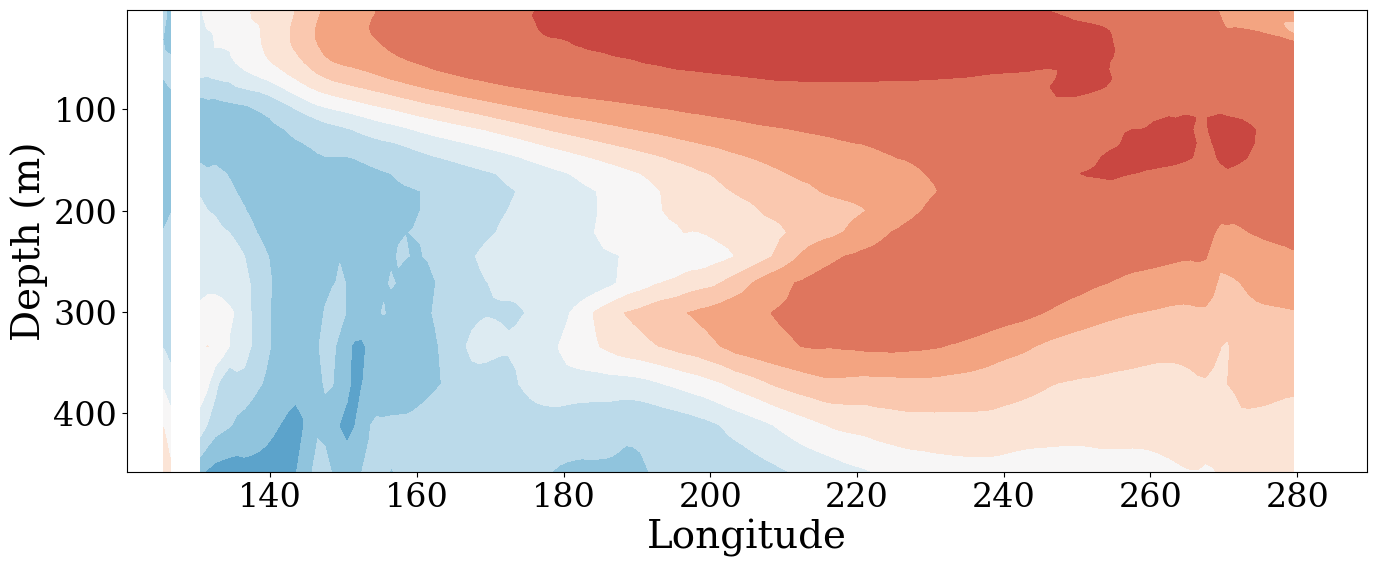

In [99]:
# Extract depth values
depths = ds["lev"].values  # Get depth levels
lons_subset = lons  # Longitude remains the same

# Set contour levels
clevs = np.linspace(-1.5, 1.5, 16)

# Create figure for depth-longitude cross-section
fig, ax = plt.subplots(figsize=(16, 6))

# Plot EOF1 as a depth-longitude cross-section
fill = ax.contourf(lons_subset, depths, eof1.squeeze(), levels=clevs, cmap=plt.cm.RdBu_r)

# Invert y-axis so depth increases downward
ax.invert_yaxis()

# Axis labels with larger font
ax.set_xlabel("Longitude", fontsize=28)
ax.set_ylabel("Depth (m)", fontsize=28)

# Larger tick labels
ax.tick_params(axis='both', which='major', labelsize=24)

# Optional colorbar (still commented out, but now has larger font if used)
# cb = plt.colorbar(fill, orientation='vertical')
# cb.set_label("Correlation Coefficient", fontsize=14)
# cb.ax.tick_params(labelsize=12)


# Show the plot
plt.show()

# Save the figure
fig.savefig('EOF1_run4_eq.png', dpi=300, bbox_inches='tight')


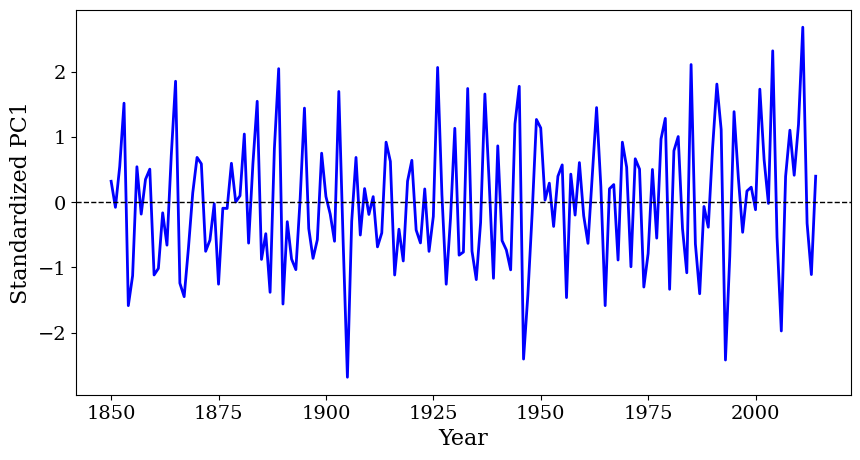

In [95]:
import matplotlib.pyplot as plt

# Definieer de tijdsvariabele (jaren)
years = ds["time.year"].values  # Haal de jaren uit je dataset

# Maak een figure en een as-object
fig, ax = plt.subplots(figsize=(10, 5))

# Plot de PC1 tijdreeks
ax.plot(years, pc1.squeeze(), color='b', linewidth=2)  # Zorg dat PC1 een 1D-array is
ax.axhline(0, color='k', linestyle="--", linewidth=1)

# Vergrote labels
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Standardized PC1", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)

# Save the figure before showing it
fig.savefig('PC1.png', dpi=300, bbox_inches='tight')

# Toon de plot
plt.show()



In [ ]:
spcs_values = pc1.squeeze()

# Create a list of (year, SPCS) pairs
spcs_list = list(zip(years, spcs_values))

# Print the list
for year, spcs in spcs_list:
    print(f"Year: {year}, SPCS: {spcs:.2f}")

## ORAs Create a combined figure:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Define data for the three lists
equator_cross_section = {
    1958: -0.43, 1959: -0.51, 1960: -0.15, 1961: -0.12, 1962: 0.17, 1963: -1.18, 1964: 0.33, 
    1965: -1.46, 1966: -0.26, 1967: 0.36, 1968: -0.47, 1969: -1.09, 1970: 1.08, 1971: 0.60, 
    1972: -1.93, 1973: 1.22, 1974: 0.63, 1975: 0.87, 1976: -0.97, 1977: -0.34, 1978: 0.12, 
    1979: -0.47, 1980: -0.32, 1981: 0.23, 1982: -1.85, 1983: -0.22, 1984: 1.46, 1985: 0.83, 
    1986: -0.40, 1987: -1.52, 1988: 2.15, 1989: 0.69, 1990: -0.54, 1991: -1.30, 1992: -0.83, 
    1993: -0.43, 1994: 0.01, 1995: 0.86, 1996: 0.88, 1997: -2.79, 1998: 1.08, 1999: 1.97, 
    2000: 1.14, 2001: 0.50, 2002: -1.00, 2003: 0.15, 2004: -0.14, 2005: 0.18, 2006: -0.25, 
    2007: 1.39, 2008: 0.81, 2009: -0.44, 2010: 0.97, 2011: 0.96, 2012: 0.14, 2013: 0.38, 
    2014: -0.73, 2015: -1.96, 2016: 0.85, 2017: 1.09, 2018: 0.02, 2019: -0.52, 2020: 0.67, 
    2021: 0.79, 2022: 0.81, 2023: -1.75
}


cross_section_240 = {
    1958: -0.73, 1959: -1.05, 1960: -0.62, 1961: -0.13, 1962: -0.09, 1963: -1.49, 1964: -0.12,
    1965: -1.49, 1966: -0.91, 1967: 0.30, 1968: -0.59, 1969: -1.03, 1970: 1.16, 1971: 1.13,
    1972: -1.35, 1973: 0.93, 1974: 1.03, 1975: 1.10, 1976: -0.66, 1977: -0.72, 1978: -0.31,
    1979: -0.84, 1980: -0.80, 1981: -0.38, 1982: -1.66, 1983: -0.94, 1984: 0.85, 1985: 0.67,
    1986: -0.38, 1987: -1.62, 1988: 1.41, 1989: 0.94, 1990: -0.32, 1991: -1.15, 1992: -1.23,
    1993: -0.72, 1994: -0.09, 1995: 0.50, 1996: 0.77, 1997: -2.06, 1998: 0.47, 1999: 2.31,
    2000: 1.58, 2001: 1.03, 2002: -0.17, 2003: 0.21, 2004: 0.09, 2005: 0.12, 2006: 0.13,
    2007: 1.49, 2008: 1.35, 2009: 0.04, 2010: 1.17, 2011: 1.85, 2012: 0.94, 2013: 0.53,
    2014: -0.44, 2015: -1.66, 2016: 0.10, 2017: 1.04, 2018: 0.52, 2019: -0.71, 2020: 0.11,
    2021: 0.81, 2022: 0.97, 2023: -1.18
}

ssts = {
    1958: -1.02, 1959: -0.38, 1960: 0.02, 1961: 0.34, 1962: 0.74, 1963: -0.46, 1964: 0.88, 
    1965: -0.99, 1966: -0.28, 1967: 0.73, 1968: 0.17, 1969: -0.80, 1970: 0.82, 1971: 1.84, 
    1972: -0.93, 1973: 1.00, 1974: 1.44, 1975: 1.84, 1976: 0.30, 1977: -0.66, 1978: -0.11, 
    1979: -0.75, 1980: -0.72, 1981: -0.04, 1982: -1.49, 1983: -1.89, 1984: 0.24, 1985: 0.54, 
    1986: -0.69, 1987: -2.09, 1988: 0.98, 1989: 1.03, 1990: -0.10, 1991: -0.85, 1992: -1.43, 
    1993: -1.48, 1994: -0.83, 1995: -0.14, 1996: 0.58, 1997: -2.18, 1998: -0.58, 1999: 1.84, 
    2000: 1.12, 2001: 0.58, 2002: -0.48, 2003: -0.43, 2004: -0.33, 2005: -0.07, 2006: -0.25, 
    2007: 1.04, 2008: 1.22, 2009: -0.19, 2010: 1.13, 2011: 1.81, 2012: 0.30, 2013: 0.57, 
    2014: -0.46, 2015: -1.34, 2016: -0.24, 2017: 0.75, 2018: 0.84, 2019: -1.15, 2020: 0.02, 
    2021: 0.91, 2022: 1.55, 2023: -1.33
}
# Flip all signs
equator_cross_section = {year: -val for year, val in equator_cross_section.items()}
cross_section_240 = {year: -val for year, val in cross_section_240.items()}
ssts = {year: -val for year, val in ssts.items()}

# Extract values
years = sorted(equator_cross_section.keys())
equator_values = np.array([equator_cross_section[year] for year in years])
cross_values = np.array([cross_section_240[year] for year in years])
sst_values = np.array([ssts[year] for year in years])

# Function to compute peak distances
def compute_peak_distances(values, years):
    peaks, _ = find_peaks(values)
    valleys, _ = find_peaks(-values)
    
    peak_years = years[peaks]
    valley_years = years[valleys]
    
    peak_distances = np.diff(peak_years)
    valley_distances = np.diff(valley_years)
    
    return peak_distances, valley_distances

# Compute distances
equator_peak_distances, equator_valley_distances = compute_peak_distances(equator_values, np.array(years))
cross_peak_distances, cross_valley_distances = compute_peak_distances(cross_values, np.array(years))
sst_peak_distances, sst_valley_distances = compute_peak_distances(sst_values, np.array(years))

# Print results
print("Equator Peak Distances:", equator_peak_distances)
print("Equator Valley Distances:", equator_valley_distances)
print("Cross Section 240 Peak Distances:", cross_peak_distances)
print("Cross Section 240 Valley Distances:", cross_valley_distances)
print("SST Peak Distances:", sst_peak_distances)
print("SST Valley Distances:", sst_valley_distances)


In [ ]:
plt.figure(figsize=(10, 6))


# Plot all three
plt.plot(years, equator_values, label="Equator", color='blue', linewidth=0.5)
plt.plot(years, cross_values, label="240°", color='red', linewidth=0.5)
plt.plot(years, sst_values, label="SSTs", color='green', linewidth=0.5)

# Add labels and legend
plt.xlabel("Year", fontsize=16, fontname='serif')
plt.ylabel("Standardized PC1", fontsize=16, fontname='serif')
plt.xticks(fontsize=14, fontname='serif')
plt.yticks(fontsize=14, fontname='serif')
plt.legend()
plt.tight_layout()

# Save the figure
plt.savefig("standardized_pc1_timeseries.png", dpi=300)

# Show the plot
plt.show()



# EC-Earth

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Define data for the three lists
equator_cross_section = {
    1850: -0.32, 1851: 0.08, 1852: -0.55, 1853: -1.52, 1854: 1.59, 1855: 1.13, 1856: -0.54, 1857: 0.18, 1858: -0.35, 1859: -0.51,
    1860: 1.12, 1861: 1.01, 1862: 0.16, 1863: 0.66, 1864: -0.72, 1865: -1.86, 1866: 1.24, 1867: 1.45, 1868: 0.70, 1869: -0.14,
    1870: -0.69, 1871: -0.59, 1872: 0.75, 1873: 0.58, 1874: 0.02, 1875: 1.26, 1876: 0.09, 1877: 0.10, 1878: -0.60, 1879: -0.00,
    1880: -0.10, 1881: -1.05, 1882: 0.63, 1883: -0.59, 1884: -1.55, 1885: 0.88, 1886: 0.48, 1887: 1.38, 1888: -0.82, 1889: -2.05,
    1890: 1.56, 1891: 0.30, 1892: 0.87, 1893: 1.03, 1894: -0.05, 1895: -1.44, 1896: 0.40, 1897: 0.86, 1898: 0.58, 1899: -0.75,
    1900: -0.09, 1901: 0.18, 1902: 0.60, 1903: -1.70, 1904: 0.59, 1905: 2.68, 1906: 0.29, 1907: -0.69, 1908: 0.50, 1909: -0.21,
    1910: 0.19, 1911: -0.09, 1912: 0.68, 1913: 0.47, 1914: -0.92, 1915: -0.63, 1916: 1.12, 1917: 0.41, 1918: 0.90, 1919: -0.32,
    1920: -0.64, 1921: 0.43, 1922: 0.62, 1923: -0.20, 1924: 0.75, 1925: 0.22, 1926: -2.07, 1927: -0.12, 1928: 1.26, 1929: 0.24,
    1930: -1.13, 1931: 0.81, 1932: 0.76, 1933: -1.75, 1934: 0.75, 1935: 1.19, 1936: 0.31, 1937: -1.66, 1938: -0.30, 1939: 1.17,
    1940: -0.87, 1941: 0.59, 1942: 0.73, 1943: 1.04, 1944: -1.20, 1945: -1.78, 1946: 2.41, 1947: 1.43, 1948: 0.18, 1949: -1.27,
    1950: -1.14, 1951: -0.03, 1952: -0.29, 1953: 0.37, 1954: -0.40, 1955: -0.57, 1956: 1.46, 1957: -0.43, 1958: 0.20, 1959: -0.61,
    1960: 0.21, 1961: 0.63, 1962: -0.42, 1963: -1.45, 1964: -0.24, 1965: 1.59, 1966: -0.21, 1967: -0.27, 1968: 0.89, 1969: -0.92,
    1970: -0.54, 1971: 0.99, 1972: -0.67, 1973: -0.51, 1974: 1.30, 1975: 0.79, 1976: -0.50, 1977: 0.55, 1978: -0.97, 1979: -1.29,
    1980: 1.33, 1981: -0.79, 1982: -1.01, 1983: 0.40, 1984: 1.08, 1985: -2.11, 1986: 0.64, 1987: 1.40, 1988: 0.06, 1989: 0.38,
    1990: -0.83, 1991: -1.81, 1992: -1.12, 1993: 2.42, 1994: 0.83, 1995: -1.39, 1996: -0.38, 1997: 0.46, 1998: -0.17, 1999: -0.23,
    2000: 0.11, 2001: -1.73, 2002: -0.65, 2003: 0.02, 2004: -2.32, 2005: 0.53, 2006: 1.97, 2007: -0.40, 2008: -1.11, 2009: -0.41,
    2010: -1.19, 2011: -2.68, 2012: 0.32, 2013: 1.11, 2014: -0.40
}


cross_section_240 = {
    1850: -0.00, 1851: 0.29, 1852: 0.06, 1853: -1.17, 1854: 1.64, 1855: 1.26, 1856: -0.26, 1857: 0.13, 1858: -0.46, 1859: -0.40,
    1860: 1.29, 1861: 1.19, 1862: 0.82, 1863: 1.12, 1864: -0.91, 1865: -2.24, 1866: 1.09, 1867: 1.54, 1868: 0.87, 1869: 0.04,
    1870: -0.51, 1871: -0.33, 1872: 1.08, 1873: 0.66, 1874: 0.07, 1875: 1.54, 1876: 0.15, 1877: -0.27, 1878: -0.63, 1879: -0.01,
    1880: 0.15, 1881: -0.93, 1882: 0.62, 1883: -0.49, 1884: -1.35, 1885: 0.77, 1886: 0.43, 1887: 1.48, 1888: -0.64, 1889: -2.15,
    1890: 1.07, 1891: 0.10, 1892: 0.77, 1893: 1.13, 1894: -0.10, 1895: -1.00, 1896: 0.41, 1897: 0.70, 1898: 0.77, 1899: -0.53,
    1900: -0.05, 1901: 0.14, 1902: 0.65, 1903: -1.45, 1904: 0.32, 1905: 2.10, 1906: 0.22, 1907: -0.75, 1908: 0.79, 1909: 0.12,
    1910: 0.38, 1911: 0.05, 1912: 0.62, 1913: 0.63, 1914: -0.56, 1915: -0.88, 1916: 0.84, 1917: 1.03, 1918: 1.17, 1919: -0.44,
    1920: -0.36, 1921: 1.03, 1922: 0.97, 1923: 0.42, 1924: 1.47, 1925: 0.51, 1926: -1.86, 1927: -0.97, 1928: 0.78, 1929: 0.36,
    1930: -1.08, 1931: 1.04, 1932: 0.73, 1933: -1.19, 1934: 0.86, 1935: 0.91, 1936: 0.11, 1937: -1.71, 1938: -1.16, 1939: 0.75,
    1940: -0.60, 1941: 0.44, 1942: 0.55, 1943: 1.01, 1944: -1.12, 1945: -1.55, 1946: 2.42, 1947: 1.59, 1948: 0.45, 1949: -1.18,
    1950: -1.30, 1951: 0.13, 1952: 0.03, 1953: 0.83, 1954: -0.42, 1955: -0.27, 1956: 1.34, 1957: -0.15, 1958: 0.48, 1959: -0.30,
    1960: 0.49, 1961: 0.29, 1962: -0.55, 1963: -1.62, 1964: -0.66, 1965: 1.63, 1966: -0.12, 1967: -0.29, 1968: 0.92, 1969: -0.79,
    1970: -0.46, 1971: 0.73, 1972: -0.69, 1973: -0.44, 1974: 1.76, 1975: 0.94, 1976: -0.28, 1977: 0.72, 1978: -0.80, 1979: -1.36,
    1980: 0.90, 1981: -1.03, 1982: -1.22, 1983: 0.50, 1984: 0.67, 1985: -2.04, 1986: -0.01, 1987: 1.17, 1988: 0.01, 1989: 0.51,
    1990: -0.68, 1991: -1.88, 1992: -1.43, 1993: 2.20, 1994: 0.81, 1995: -1.26, 1996: -0.89, 1997: -0.08, 1998: -0.57, 1999: -0.33,
    2000: 0.15, 2001: -1.61, 2002: -0.54, 2003: -0.17, 2004: -2.53, 2005: -0.57, 2006: 1.51, 2007: -0.52, 2008: -1.42, 2009: -0.93,
    2010: -1.47, 2011: -2.68, 2012: -0.75, 2013: 0.04, 2014: -1.01
}
ssts = {
    1850: -0.05, 1851: 0.23, 1852: -0.20, 1853: -0.89, 1854: 0.74, 1855: 1.96, 1856: 0.60, 1857: -0.08, 1858: -0.01, 1859: -0.39,
    1860: 0.70, 1861: 1.56, 1862: 1.20, 1863: 1.19, 1864: -0.62, 1865: -1.69, 1866: 0.72, 1867: 1.73, 1868: 0.95, 1869: 0.31,
    1870: -0.57, 1871: -0.55, 1872: 0.19, 1873: 0.90, 1874: 0.45, 1875: 1.05, 1876: 0.49, 1877: -0.28, 1878: -0.56, 1879: -0.25,
    1880: 0.13, 1881: -0.72, 1882: 0.03, 1883: -0.23, 1884: -0.79, 1885: 0.58, 1886: 0.98, 1887: 1.27, 1888: -0.24, 1889: -1.93,
    1890: 0.27, 1891: 0.80, 1892: 0.62, 1893: 1.35, 1894: 0.53, 1895: -0.66, 1896: -0.05, 1897: 1.17, 1898: 0.99, 1899: -0.28,
    1900: -0.70, 1901: 0.39, 1902: 0.64, 1903: -0.82, 1904: -0.05, 1905: 2.85, 1906: 1.35, 1907: -0.14, 1908: 0.62, 1909: 0.66,
    1910: -0.02, 1911: 0.30, 1912: 0.72, 1913: 0.63, 1914: -0.31, 1915: -0.32, 1916: 1.08, 1917: 0.86, 1918: 1.34, 1919: -0.10,
    1920: -0.31, 1921: 0.60, 1922: 1.01, 1923: 0.36, 1924: 0.82, 1925: 0.55, 1926: -1.49, 1927: -0.90, 1928: 1.10, 1929: 0.52,
    1930: -1.00, 1931: 0.36, 1932: 1.17, 1933: -0.79, 1934: 0.03, 1935: 1.32, 1936: 0.64, 1937: -1.06, 1938: -1.03, 1939: 0.97,
    1940: -0.34, 1941: -0.02, 1942: 0.81, 1943: 1.16, 1944: -0.38, 1945: -1.47, 1946: 1.76, 1947: 2.14, 1948: 1.12, 1949: -0.75,
    1950: -1.23, 1951: -0.30, 1952: -0.14, 1953: 0.38, 1954: 0.02, 1955: -0.33, 1956: 1.20, 1957: 0.21, 1958: -0.05, 1959: -0.32,
    1960: -0.11, 1961: 0.50, 1962: -0.58, 1963: -1.08, 1964: -0.09, 1965: 1.88, 1966: 0.49, 1967: -0.34, 1968: 0.62, 1969: -0.51,
    1970: -1.00, 1971: 0.45, 1972: -0.41, 1973: -0.76, 1974: 0.72, 1975: 1.21, 1976: 0.21, 1977: 0.53, 1978: -0.42, 1979: -1.49,
    1980: 0.18, 1981: -0.65, 1982: -1.44, 1983: -0.35, 1984: 0.74, 1985: -1.33, 1986: -0.39, 1987: 1.45, 1988: -0.08, 1989: -0.14,
    1990: -0.61, 1991: -1.85, 1992: -1.29, 1993: 1.57, 1994: 0.98, 1995: -0.90, 1996: -1.35, 1997: -0.29, 1998: -0.98, 1999: -1.07,
    2000: -0.39, 2001: -1.81, 2002: -1.56, 2003: -0.91, 2004: -2.47, 2005: -1.06, 2006: 1.17, 2007: -0.62, 2008: -2.03, 2009: -1.63,
    2010: -2.20, 2011: -3.34, 2012: -1.62, 2013: -0.13, 2014: -1.38
}

# Flip all signs
equator_cross_section = {year: -val for year, val in equator_cross_section.items()}
cross_section_240 = {year: -val for year, val in cross_section_240.items()}
ssts = {year: -val for year, val in ssts.items()}

# Extract values
years = sorted(equator_cross_section.keys())
equator_values = np.array([equator_cross_section[year] for year in years])
cross_values = np.array([cross_section_240[year] for year in years])
sst_values = np.array([ssts[year] for year in years])

# Function to compute peak distances
def compute_peak_distances(values, years):
    peaks, _ = find_peaks(values)
    valleys, _ = find_peaks(-values)
    
    peak_years = years[peaks]
    valley_years = years[valleys]
    
    peak_distances = np.diff(peak_years)
    valley_distances = np.diff(valley_years)
    
    return peak_distances, valley_distances

# Compute distances
equator_peak_distances, equator_valley_distances = compute_peak_distances(equator_values, np.array(years))
cross_peak_distances, cross_valley_distances = compute_peak_distances(cross_values, np.array(years))
sst_peak_distances, sst_valley_distances = compute_peak_distances(sst_values, np.array(years))

# Print results
print("Equator Peak Distances:", equator_peak_distances)
print("Equator Valley Distances:", equator_valley_distances)
print("Cross Section 240 Peak Distances:", cross_peak_distances)
print("Cross Section 240 Valley Distances:", cross_valley_distances)
print("SST Peak Distances:", sst_peak_distances)
print("SST Valley Distances:", sst_valley_distances)


In [ ]:
plt.figure(figsize=(10,6))
# Plot all three
plt.plot(years, equator_values, label="Equator", color='blue', linewidth=0.5)
plt.plot(years, cross_values, label="240°", color='red', linewidth=0.5)
plt.plot(years, sst_values, label="SSTs", color='green', linewidth=0.5)

# Add labels and legend
plt.xlabel("Year", fontsize=16, fontname='serif')
plt.ylabel("Standardized PC1", fontsize=16, fontname='serif')
plt.xticks(fontsize=14, fontname='serif')
plt.yticks(fontsize=14, fontname='serif')
plt.legend()
plt.tight_layout()

# Save the figure
plt.savefig("standardized_pc1_timeseries.png", dpi=300)

# Show the plot
plt.show()
